In [1]:
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [2]:
import numpy as np
import pandas as pd
import random
import calendar
import matplotlib.pyplot as plt
from scipy.stats import mstats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.gofplots import qqline
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
############################################################################################
# Settings for the calculations that can be changed
lags = 16  # months of lagged FC
Minimum_Number_Stocks = 0.2  # Firm characteritics that are avvailable for at least 20% of stocks

Upper_limit = 0.98       # FC upper outliers
Lower_limit = 1-Upper_limit # FC lower outliers

def winsorize_df(df):
    return df.apply(winsorize_series, axis=0)

def winsorize_series(s):
    return mstats.winsorize(s, limits=[1-Upper_limit, Lower_limit])

In [4]:
############################################################################################
# Read Data

# # # Colab 사용할 경우 구글드라이버 폴더에 접근하게 함
# from google.colab import drive
# drive.mount('/gdrive')
# df = pd.read_excel("/gdrive//MyDrive/QuantFinance/QuantDataR.xlsx", None, index_col=0 )

# 자산의 컴퓨터에 저장된 데이터 읽기
data= 'QuantDataR.xlsx'
df = pd.read_excel(data, None, index_col=0 )  # 자신의 컴퓨터에 설치된 파이썬을 사용하는 경우. 파이썬 코드와 데이터 화일의 위치가 동일해야함. 아니면 폴더 경로를 명시

print("==========================================================================")
print("Spreadsheet 확인")
df_names = list(df.keys())
print(df_names)


Spreadsheet 확인
['D_Market', 'D_RI', 'D_TradingValue', 'D_P', 'M_Market', 'Beta', 'Volatility', 'DY', 'RI', 'TradingValue', 'Cash', 'AccReceivables', 'Inventory', 'CurrentAsset', 'R&D', 'Plants', 'Intangible', 'Total Asset', 'AccPayable', 'CurrentLiability', 'LongTermDebt', 'TotalLiability', 'CommonEquity', 'TotalShareEqu', 'Sales', 'CoGS', 'DepArm', 'OperatingIncome', 'EBIT', 'Interest', 'NetIncome', 'DividendPerShare', 'EPS', 'CommonShares', 'Investment', 'Employee', 'WorkingCap', 'MarketValue']


In [166]:
# 개별주식의 총수익률 (RI) 데이터 읽음
RID = df['RI']
print("--------------------------------------------------------------------------")
print("데이터형식 확인")
print(RID)

# Dates
date = RID.index
print("--------------------------------------------------------------------------")
print("Dates")
print(date)

#firm names using 'D_Price'
D_Price = df['D_P']
firm_names =  D_Price.columns
print("--------------------------------------------------------------------------")
print("FIrm Names")
print(firm_names)

--------------------------------------------------------------------------
데이터형식 확인
            A SELF-ADMINISTERED REIT.TST. - TOT RETURN IND  \
Name                                                         
2006-08-31                                             NaN   
2006-09-29                                             NaN   
2006-10-31                                             NaN   
2006-11-30                                             NaN   
2006-12-29                                             NaN   
...                                                    ...   
2020-05-29                                          171.99   
2020-06-30                                          167.76   
2020-07-31                                          170.41   
2020-08-31                                          173.85   
2020-09-30                                          198.19   

            ABLE C&C - TOT RETURN IND  AEKYUNG IND - TOT RETURN IND  \
Name                                  

In [167]:
############################################################################################
# Calculation of log-returns

R = []
print("Null stocks: ", end ='')
for i in range(0,RID.shape[1]):

    if RID.shape[0] - RID.iloc[:, i ].isnull().sum() < 2:

        print (i, ", ", end='')
        R_temp = pd.Series([np.nan]*(RID.shape[0]-1))
        R.append(R_temp)
        continue

    lag0 = (np.log(RID.iloc[1:, i ])).reset_index(drop =True)
    lag1 = (np.log(RID.iloc[0:-1, i ])).reset_index(drop =True)


    R_temp =  (lag0-lag1)*100
    R.append(R_temp)


R = pd.concat(R,axis= 1)
R.index = date[1:]
R.columns =firm_names

R = R.replace([np.inf, -np.inf], np.nan)

Null stocks: 25 , 747 , 

In [51]:
df.keys()

dict_keys(['D_Market', 'D_RI', 'D_TradingValue', 'D_P', 'M_Market', 'Beta', 'Volatility', 'DY', 'RI', 'TradingValue', 'Cash', 'AccReceivables', 'Inventory', 'CurrentAsset', 'R&D', 'Plants', 'Intangible', 'Total Asset', 'AccPayable', 'CurrentLiability', 'LongTermDebt', 'TotalLiability', 'CommonEquity', 'TotalShareEqu', 'Sales', 'CoGS', 'DepArm', 'OperatingIncome', 'EBIT', 'Interest', 'NetIncome', 'DividendPerShare', 'EPS', 'CommonShares', 'Investment', 'Employee', 'WorkingCap', 'MarketValue'])

In [175]:
D_Price

,A SELF-ADMINISTERED REIT.TST.,ABLE C&C,AEKYUNG IND,AIR BUSAN,AJ NETWORKS,AJU CAPITAL,AK HOLDINGS,AK PETROCHEMICAL,ALUKO,AMOREPACIFIC,...,YOUNGONE,YOUNGONE HOLDINGS,YOUNGWIRE,YUANTA SECURITIES KOREA,YUHAN,YUHWA SECURITIES,YUNGJIN PHARM,YUYANG D&U SUSP - SUSP.20/03/20,YUYU PHARMA,ZINUS
Name,,,,,,,,,,,,,,,,,,,,,
2005-10-28,NaN,9542.64,NaN,NaN,NaN,NaN,16749.75,NaN,NaN,NaN,...,NaN,4845.52,NaN,6918.66,16088.62,2820,4035.01,781.0,11739.99,NaN
2005-10-31,NaN,9710.35,NaN,NaN,NaN,NaN,17226.22,NaN,NaN,NaN,...,NaN,4877.34,NaN,6965.79,16027.21,2880,4107.21,800.0,11779.99,NaN
2005-11-01,NaN,9374.93,NaN,NaN,NaN,NaN,17959.25,NaN,NaN,NaN,...,NaN,4885.30,NaN,7437.09,16027.21,3020,4272.86,823.0,12400.00,NaN
2005-11-02,NaN,9374.93,NaN,NaN,NaN,NaN,18215.81,NaN,NaN,NaN,...,NaN,4821.65,NaN,7531.34,17439.57,2950,4434.26,870.0,12400.00,NaN
2005-11-03,NaN,9475.55,NaN,NaN,NaN,NaN,18215.81,NaN,NaN,NaN,...,NaN,4758.00,NaN,7352.25,17193.95,2990,4417.27,929.0,12220.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,8180.0,7560.00,20900.0,3314.57,3905.0,12650.0,17400.00,7330.0,3990.0,170000.0,...,28600.0,37150.00,1120.0,2765.00,61700.00,2260,7560.00,1220.0,14500.00,80800.0
2020-10-20,8190.0,7470.00,20700.0,3405.00,3695.0,12800.0,17400.00,7630.0,3900.0,168500.0,...,29050.0,37050.00,1100.0,2760.00,60600.00,2230,7500.00,1220.0,14250.00,80700.0
2020-10-21,8240.0,7620.00,21650.0,3445.00,3775.0,13500.0,17700.00,7630.0,4120.0,167000.0,...,30700.0,38250.00,1115.0,2840.00,60600.00,2260,7890.00,1220.0,14550.00,80800.0


In [145]:
############################################################################################
# Firm Characteristics : Among 37 sheets we need 6th~37th sheet

# BE = Book Equity, ME = Market Equity
BE = df["CommonEquity"].iloc[1:,:]
BE.columns = firm_names
FC_date = date

BE_L = BE.shift(lags)   # 16달 lag

ME = (df["MarketValue"] *1000).iloc[1:,:]
ME.columns = firm_names
# ME_L = ME.shift(1)       # 1달 lag

FC = (BE_L/ME)

FC = FC.replace([np.inf, -np.inf], np.nan)

In [216]:
# R&D
RD = df["R&D"].iloc[1:,:]
RD.columns = firm_names
FC_date = date

RD_L = RD.shift(lags)   # 16달 lag

ME = (df["MarketValue"] *1000).iloc[1:,:]
ME.columns = firm_names
# ME_L = ME.shift(1)       # 1달 lag

FC = (RD_L/ME)

FC = FC.replace([np.inf, -np.inf], np.nan)

In [205]:
# Ola
RD = df["OperatingIncome"].iloc[1:,:]
RD.columns = firm_names
FC_date = date

RD_L = RD.shift(lags)   # 16달 lag

ME = (df["Total Asset"] *1000).iloc[1:,:]
ME.columns = firm_names
ME_L = ME.shift(lags+12)       # 1달 lag

FC = (RD_L/ME_L)

FC = FC.replace([np.inf, -np.inf], np.nan)

In [95]:
# OCP
Ca = df["Cash"].iloc[1:,:]
Ca.columns = firm_names
FC_date = date

Ca_L = Ca.shift(lags)   # 16달 lag

ME = (df["MarketValue"] *1000).iloc[1:,:]
ME.columns = firm_names

FC = (Ca_L/ME)

FC = FC.replace([np.inf, -np.inf], np.nan)

In [80]:
R

,A SELF-ADMINISTERED REIT.TST.,ABLE C&C,AEKYUNG IND,AIR BUSAN,AJ NETWORKS,AJU CAPITAL,AK HOLDINGS,AK PETROCHEMICAL,ALUKO,AMOREPACIFIC,...,YOUNGONE,YOUNGONE HOLDINGS,YOUNGWIRE,YUANTA SECURITIES KOREA,YUHAN,YUHWA SECURITIES,YUNGJIN PHARM,YUYANG D&U SUSP - SUSP.20/03/20,YUYU PHARMA,ZINUS
Name,,,,,,,,,,,,,,,,,,,,,
2006-09-29,NaN,4.372000,NaN,NaN,NaN,NaN,7.141876,NaN,NaN,5.134395,...,NaN,-1.769292,NaN,-15.478031,-1.686353,9.282379,-6.636260,-1.606686,12.537859,NaN
2006-10-31,NaN,24.040686,NaN,NaN,NaN,NaN,-3.661894,NaN,NaN,10.347756,...,NaN,18.232360,NaN,0.439913,7.532121,-0.710976,-3.315221,2.394922,2.515770,NaN
2006-11-30,NaN,-13.268377,NaN,NaN,NaN,NaN,22.187603,NaN,NaN,3.427755,...,NaN,-6.348414,NaN,0.874062,12.720251,2.119893,4.127133,19.926229,16.298349,NaN
2006-12-29,NaN,-9.720986,NaN,NaN,NaN,NaN,6.587641,NaN,NaN,14.639900,...,NaN,11.726833,NaN,-3.994883,4.287795,5.773549,-9.020196,-25.181935,-0.794812,NaN
2007-01-31,NaN,-14.786239,NaN,NaN,NaN,NaN,-12.593045,NaN,NaN,-3.150868,...,NaN,5.225048,NaN,-17.452984,-19.817767,-0.994886,-27.013776,-9.121601,2.105619,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-29,14.543823,-9.827651,-13.454202,-3.198141,0.273926,0.406472,-15.345594,-2.561705,3.113510,-8.240755,...,12.124944,1.451122,15.273440,3.605799,9.598503,-2.197949,5.344658,0.000000,5.287312,-1.056980
2020-06-30,-2.490195,0.864266,-6.181051,0.513237,-26.955366,-9.814840,-15.150673,-7.166154,-9.903805,2.723967,...,-18.787358,-7.475469,-5.572448,-2.087551,-2.536689,-3.160895,4.647648,0.000000,14.367407,-4.884378
2020-07-31,1.567291,-10.800751,-3.692683,-4.083322,10.911437,2.655203,-3.269336,5.276760,13.169147,-0.898341,...,-5.046627,-10.636853,5.992454,8.977000,12.434879,-1.385467,16.794460,0.000000,15.468103,-0.873907


In [217]:
# Winsorizing FC (to control outliers)
FC = winsorize_df(FC)

# Nomalization
NFC = (FC -np.mean(FC))/np.std(FC)
# 평균 0, 분산(표준편차) 1로 정규화

# # when you want to pass the processing of winszerizing and nomaization
# NFC = FC

# Replacing NA  to 0
NFC = NFC.fillna(0)

# Check the Winsorized and Normalized FC
NFC.describe()


,A SELF-ADMINISTERED REIT.TST.,ABLE C&C,AEKYUNG IND,AIR BUSAN,AJ NETWORKS,AJU CAPITAL,AK HOLDINGS,AK PETROCHEMICAL,ALUKO,AMOREPACIFIC,...,YOUNGONE,YOUNGONE HOLDINGS,YOUNGWIRE,YUANTA SECURITIES KOREA,YUHAN,YUHWA SECURITIES,YUNGJIN PHARM,YUYANG D&U SUSP - SUSP.20/03/20,YUYU PHARMA,ZINUS
count,169.0,169.000000,169.000000,169.0,169.0,169.0,169.000000,169.000000,169.000000,169.000000,...,169.0,169.000000,169.000000,169.0,169.000000,169.0,169.000000,169.000000,169.000000,169.000000
mean,0.0,-2.657403,-0.412959,0.0,0.0,0.0,-0.196189,-0.609068,-15.781207,-5.649522,...,-inf,-27.642390,-1.878018,0.0,-0.642650,0.0,-0.914740,-0.438459,0.115891,-1.370905
std,0.0,1.499992,0.973755,0.0,0.0,0.0,0.956433,0.930160,15.024124,2.065991,...,NaN,30.312461,2.842673,0.0,0.976812,0.0,0.999369,0.838806,0.955053,4.980596
min,0.0,-4.094124,-3.518664,0.0,0.0,0.0,-1.551133,-2.587182,-30.731796,-8.137460,...,-inf,-61.953361,-6.925659,0.0,-1.851068,0.0,-2.588302,-1.880173,-1.166375,-20.262314
25%,0.0,-3.581273,0.000000,0.0,0.0,0.0,-0.900761,-1.187709,-30.502368,-6.887614,...,NaN,-60.773170,-4.892255,0.0,-1.536885,0.0,-1.674140,-1.181590,-0.493975,0.000000
50%,0.0,-3.236966,0.000000,0.0,0.0,0.0,-0.291317,0.000000,-27.301939,-6.100774,...,0.0,0.000000,0.000000,0.0,-0.991270,0.0,-0.831404,0.000000,0.000000,0.000000
75%,0.0,-2.466852,0.000000,0.0,0.0,0.0,0.315140,0.000000,0.000000,-5.157699,...,0.0,0.000000,0.000000,0.0,0.246796,0.0,-0.166891,0.000000,0.502580,0.000000
max,0.0,2.063649,0.000000,0.0,0.0,0.0,3.415812,1.221730,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,2.027314,0.0,1.859331,2.145307,3.582041,0.000000


In [79]:
NFC

,A SELF-ADMINISTERED REIT.TST.,ABLE C&C,AEKYUNG IND,AIR BUSAN,AJ NETWORKS,AJU CAPITAL,AK HOLDINGS,AK PETROCHEMICAL,ALUKO,AMOREPACIFIC,...,YOUNGONE,YOUNGONE HOLDINGS,YOUNGWIRE,YUANTA SECURITIES KOREA,YUHAN,YUHWA SECURITIES,YUNGJIN PHARM,YUYANG D&U SUSP - SUSP.20/03/20,YUYU PHARMA,ZINUS
Name,,,,,,,,,,,,,,,,,,,,,
2006-09-29,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-10-31,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-11-30,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-12-29,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-01-31,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-29,1.059237,-0.171284,3.084977,-0.895098,-0.58977,-0.58511,0.40497,1.487722,-0.289118,1.488551,...,1.210256,1.14879,-0.390602,-1.405086,-0.79915,-1.402891,1.020921,-1.049471,1.064517,1.473135
2020-06-30,1.059237,-0.171284,3.084977,-0.895098,-0.58977,-0.58511,0.40497,1.487722,-0.289118,1.488551,...,1.210256,1.14879,-0.390602,-1.405086,-0.79915,-1.402891,1.020921,-1.049471,1.064517,1.473135
2020-07-31,1.059237,-0.171284,3.084977,-0.895098,-0.58977,-0.58511,0.40497,1.487722,-0.289118,1.488551,...,1.210256,1.14879,-0.390602,-1.405086,-0.79915,-1.402891,1.020921,-1.049471,1.064517,1.473135


In [33]:
len(NFC.T)

792

In [194]:
# 날짜별로 그룹별 평균 모멘텀과 차이를 계산하는 함수
def calculate_momentum_difference_per_date(df):
    results = []
    for date in df.index:
        # 해당 날짜까지의 6개월 데이터 추출
        end_date = date
        start_date = end_date - pd.DateOffset(months=12)
        data = df[(df.index >= start_date) & (df.index <= end_date)]

        # 6개월 최고가 계산
        highest_price_6m = data.max()
        
        # 모멘텀 계산
        current_price_on_date = data.loc[end_date]
        momentum_6m = current_price_on_date / highest_price_6m

        # 상위 30%와 하위 30%를 찾기
        winner_threshold = momentum_6m.quantile(0.7)
        loser_threshold = momentum_6m.quantile(0.3)

        winners = momentum_6m[momentum_6m >= winner_threshold]
        losers = momentum_6m[momentum_6m <= loser_threshold]

        # 그룹별 평균 계산
        average_winner = winners.mean()
        average_loser = losers.mean()

        # 차이 계산
        difference = average_winner - average_loser

        results.append((date, average_winner, average_loser, difference))

    return pd.DataFrame(results, columns=['Name', 'Average Winner', 'Average Loser', 'HML'])

# 함수 적용
momentum_results_per_date = calculate_momentum_difference_per_date(D_Price)

# 결과 확인
momentum_results_per_date.tail() # 마지막 5개 날짜의 결과 확인



,Name,Average Winner,Average Loser,HML
3906,2020-10-19,0.911471,0.614064,0.297407
3907,2020-10-20,0.910715,0.610795,0.299920
3908,2020-10-21,0.919734,0.618098,0.301636
3909,2020-10-22,0.913649,0.613110,0.300539
3910,2020-10-23,0.913161,0.615822,0.297339


In [147]:
results = pd.DataFrame(np.empty((NFC.shape[0],3))*np.nan, index=R.index, columns=['Alpha','Beta','R2'])
Alpha = []
Beta = []
R2 = []


for t in range(lags+1,NFC.shape[0]):

    if NFC.shape[1]-(NFC.iloc[t-1,:]==0).sum()>100:
        XX = sm.add_constant(NFC.iloc[t-1,:]) #### warrning

        #There are object columns in df ,so convert these to float
        XX = pd.DataFrame(XX, dtype='float')

        Y = R.iloc[t,:] # returns of individual stocks at time t

        # remove omit value
        sdata = pd.concat([XX,Y],axis = 1 )
        sdata = sdata.dropna(axis=0).reset_index(drop =True)
        sdata.columns = ['Const','BM','RET']

        XX = sdata[['Const','BM']]

        Y = sdata.loc[:,'RET']

        coef = np.linalg.inv(XX.T @ XX) @ XX.T @ Y

        Alpha.append(coef[0])
        Beta.append(coef[1])

        resid  = Y - XX @ coef.values
        r2 =  1- (resid.T @ resid)  / (sdata.shape[0]-2) / np.var(Y)
        R2.append(r2)

        results.iloc[t,:] = [coef[0], coef[1], r2]

# results = pd.concat([pd.Series(Alpha),
                #    pd.Series(Beta),
                #    pd.Series(R2)], axis=1)

results

,Alpha,Beta,R2
Name,,,
2006-09-29,NaN,NaN,NaN
2006-10-31,NaN,NaN,NaN
2006-11-30,NaN,NaN,NaN
2006-12-29,NaN,NaN,NaN
2007-01-31,NaN,NaN,NaN
...,...,...,...
2020-05-29,4.858583,-0.108126,-0.001151
2020-06-30,-1.506593,-0.028994,-0.002236
2020-07-31,6.718917,-0.007210,-0.002544


In [134]:
print("Alpha")
print("Mean:",results["Alpha"].dropna().mean(), "STD_M:",results["Alpha"].dropna().std() /math.sqrt(results["Alpha"].dropna().shape[0]))
print("Beta")
print("Mean:",results["Beta"].dropna().mean(), "STD_M:",results["Beta"].dropna().std() /math.sqrt(results["Beta"].dropna().shape[0]))
print("R2: ", results["R2"].dropna().mean())


Alpha
Mean: -0.3569292480439873 STD_M: 0.6924546780875687
Beta
Mean: 4.0512439618309733e-05 STD_M: 9.937652620005288e-05
R2:  -0.0017698047237467047


In [218]:
########################################################################
# Identification of Factors
#######################################################################

RHPS = pd.DataFrame(np.empty((NFC.shape[0],11))*np.nan, index=R.index, columns=['Number_Stocks','High_BM','2','3','Low_BM','RET_High_BM','2','3','4','RET_Low_BM','HML'])

quantile_FC =  NFC.quantile(q=[.2, .4, .6 , .8 ], interpolation='nearest', axis=1).T

for t in range(lags+1, NFC.shape[0]-1):

        if (NFC.shape[1]- NFC.iloc[t,:].isnull().sum())>100:

            RHPS.iloc[t,0] = (NFC.shape[1]- NFC.iloc[t,:].isnull().sum())  # the number of stocks that are used to form portfolios
            Y = R.iloc[t+1,:]
            RHPS.iloc[t,1:5] = quantile_FC.iloc[t,:]

            L = NFC.iloc[t,:] <= quantile_FC.iloc[t,0]
            H = NFC.iloc[t,:] >= quantile_FC.iloc[t,3]
            RHPS.iloc[t+1,10] = Y[H].dropna().mean()  - Y[L].dropna().mean()

            RHPS.iloc[t,1] = quantile_FC.iloc[t,3]
            RHPS.iloc[t,2] = quantile_FC.iloc[t,2]
            RHPS.iloc[t,3] = quantile_FC.iloc[t,1]
            RHPS.iloc[t,4] = quantile_FC.iloc[t,0]

            P1 = (NFC.iloc[t,:] >= quantile_FC.iloc[t,3])
            P2 = (NFC.iloc[t,:] > quantile_FC.iloc[t,2]) & (NFC.iloc[t,:] <= quantile_FC.iloc[t,3])
            P3 = (NFC.iloc[t,:] > quantile_FC.iloc[t,1]) & (NFC.iloc[t,:] <= quantile_FC.iloc[t,2])
            P4 = (NFC.iloc[t,:] > quantile_FC.iloc[t,0]) & (NFC.iloc[t,:] <= quantile_FC.iloc[t,1])
            P5 = (NFC.iloc[t,:] <= quantile_FC.iloc[t,0])


            RHPS.iloc[t+1,5] =  Y[P1].dropna().mean()
            RHPS.iloc[t+1,6] =  Y[P2].dropna().mean()
            RHPS.iloc[t+1,7] =  Y[P3].dropna().mean()
            RHPS.iloc[t+1,8] =  Y[P4].dropna().mean()
            RHPS.iloc[t+1,9] =  Y[P5].dropna().mean()

RHPS

,Number_Stocks,High_BM,2,3,Low_BM,RET_High_BM,2,3,4,RET_Low_BM,HML
Name,,,,,,,,,,,
2006-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-29,792.0,0.967749,0.0,-0.700495,-4.891964,6.392950,7.442431,3.893447,4.981515,3.803562,2.589388
2020-06-30,792.0,0.908970,0.0,-0.690975,-4.939551,-0.149809,1.692208,-2.608259,-0.359038,-3.475289,3.325480
2020-07-31,792.0,0.736308,0.0,-0.779175,-4.964962,8.839338,10.930449,5.655144,6.791251,4.756751,4.082587


In [195]:
mom = momentum_results_per_date.set_index('Name')
mom

,Average Winner,Average Loser,HML
Name,,,
2005-10-28,1.000000,1.000000,0.000000
2005-10-31,1.000000,0.994629,0.005371
2005-11-01,1.000000,0.975785,0.024215
2005-11-02,1.000000,0.975025,0.024975
2005-11-03,1.000000,0.968197,0.031803
...,...,...,...
2020-10-19,0.911471,0.614064,0.297407
2020-10-20,0.910715,0.610795,0.299920
2020-10-21,0.919734,0.618098,0.301636


In [219]:
RDM= RHPS['HML']

In [233]:
Mean = RHPS["2008-03":"2020-07"].mean(axis=0 )
STD_M = (RHPS["2008-03":"2020-07"].std() /math.sqrt(RHPS["2008-03":"2020-07"].shape[0]-lags-1))
t_statistic = Mean/STD_M

result = pd.concat([Mean,STD_M,t_statistic], axis=1)
result.columns = ['Mean','STD_M','t_statistic']
result.T

,Number_Stocks,High_BM,2,3,Low_BM,RET_High_BM,2,3,4,RET_Low_BM,HML
Mean,792.0,0.122174,0.0,-0.295418,-3.461242,0.255830,-0.766854,-0.452872,-0.118142,0.007491,0.248339
STD_M,0.0,0.023489,0.0,0.028178,0.098799,0.555492,0.685797,0.441329,0.555927,0.499035,0.129829
t_statistic,inf,5.201294,NaN,-10.483888,-35.033248,0.460547,-1.118194,-1.026154,-0.212513,0.015011,1.912812


In [196]:
Mean = mom["2008-03":"2020-07"].mean(axis=0 )
STD_M = (mom["2008-03":"2020-07"].std() /math.sqrt(RHPS["2008-03":"2020-07"].shape[0]-lags-1))
t_statistic = Mean/STD_M

result = pd.concat([Mean,STD_M,t_statistic], axis=1)
result.columns = ['Mean','STD_M','t_statistic']
result.T

,Average Winner,Average Loser,HML
Mean,0.908698,0.559304,0.349394
STD_M,0.005241,0.006550,0.002519
t_statistic,173.396739,85.388432,138.694031


In [160]:
BM

Name
2006-09-29         NaN
2006-10-31         NaN
2006-11-30         NaN
2006-12-29         NaN
2007-01-31         NaN
                ...   
2020-05-29   -2.485643
2020-06-30   -3.231045
2020-07-31   -0.305172
2020-08-31   -2.712622
2020-09-30    3.835833
Name: HML, Length: 169, dtype: float64

In [156]:
OLA = RHPS['HML']
OLA

Name
2006-09-29         NaN
2006-10-31         NaN
2006-11-30         NaN
2006-12-29         NaN
2007-01-31         NaN
                ...   
2020-05-29   -0.189029
2020-06-30   -0.776733
2020-07-31    1.195551
2020-08-31   -1.308110
2020-09-30    1.546435
Name: HML, Length: 169, dtype: float64

In [220]:
import pandas as pd

# 세 변수를 수평으로 결합하여 DataFrame 생성
final = pd.concat([OLA, BM, RDM], axis=1)

# 열 이름 설정 (선택사항)
final.columns = ['OLA', 'BM', 'RDM']

# DataFrame 출력
print(final)

                 OLA        BM       RDM
Name                                    
2006-09-29       NaN       NaN       NaN
2006-10-31       NaN       NaN       NaN
2006-11-30       NaN       NaN       NaN
2006-12-29       NaN       NaN       NaN
2007-01-31       NaN       NaN       NaN
...              ...       ...       ...
2020-05-29 -0.189029 -2.485643  2.589388
2020-06-30 -0.776733 -3.231045  3.325480
2020-07-31  1.195551 -0.305172  4.082587
2020-08-31 -1.308110 -2.712622  2.568401
2020-09-30  1.546435  3.835833  1.991730

[169 rows x 3 columns]


In [198]:
final['OLA_sum'] = final['OLA'].cumsum()
final['BM_sum'] = final['BM'].cumsum()
final

,OLA,BM,OLA_sum,BM_sum
Name,,,,
2006-09-29,NaN,NaN,NaN,NaN
2006-10-31,NaN,NaN,NaN,NaN
2006-11-30,NaN,NaN,NaN,NaN
2006-12-29,NaN,NaN,NaN,NaN
2007-01-31,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-05-29,-0.189029,-2.485643,100.663124,138.094921
2020-06-30,-0.776733,-3.231045,99.886391,134.863876
2020-07-31,1.195551,-0.305172,101.081942,134.558704


In [230]:
MR = Mdata.loc["2008-03":"2020-07","RKOSPI"]
RF = Mdata.loc["2008-03":"2020-07","RF_M"]
MPF=  pd.concat([MR-RF],axis = 1)
MPF['0']

KeyError: '0'

In [227]:
final

,OLA,BM,RDM
Name,,,
2006-09-29,NaN,NaN,NaN
2006-10-31,NaN,NaN,NaN
2006-11-30,NaN,NaN,NaN
2006-12-29,NaN,NaN,NaN
2007-01-31,NaN,NaN,NaN
...,...,...,...
2020-05-29,-0.189029,-2.485643,2.589388
2020-06-30,-0.776733,-3.231045,3.325480
2020-07-31,1.195551,-0.305172,4.082587


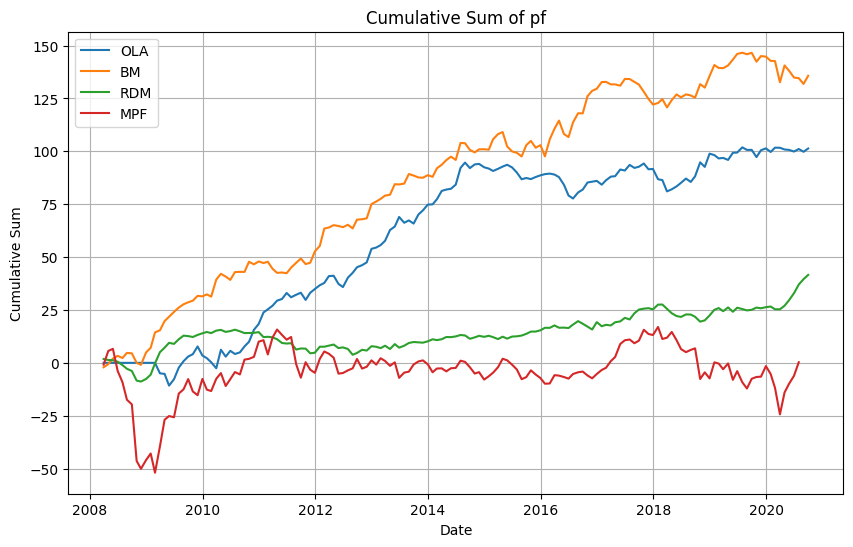

In [232]:
# 누적합을 계산합니다.
final_cumsum = final.cumsum()

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(final_cumsum.index, final_cumsum['OLA'], label='OLA')
plt.plot(final_cumsum.index, final_cumsum['BM'], label='BM')
plt.plot(final_cumsum.index, final_cumsum['RDM'], label='RDM')
plt.plot(MPF.index, MPF[0].cumsum(), label='MPF')
MPF
plt.title('Cumulative Sum of pf')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
cumulative_return_hml = RHPS['HML'].cumsum()
cumulative_return_hml

Name
2006-09-29           NaN
2006-10-31           NaN
2006-11-30           NaN
2006-12-29           NaN
2007-01-31           NaN
                 ...    
2020-05-29    138.094921
2020-06-30    134.863876
2020-07-31    134.558704
2020-08-31    131.846082
2020-09-30    135.681915
Name: HML, Length: 169, dtype: float64

In [113]:
value = cumulative_return_hml

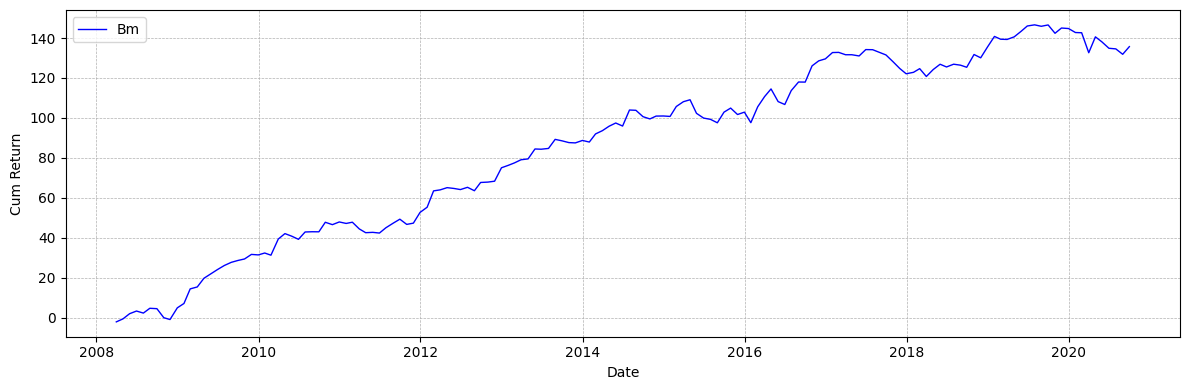

In [140]:
# Create a DataFrame for plotting
df_hml = value
# Create the plot
plt.figure(figsize=(12, 4))  # Set the figure size to match the reference image
plt.plot(df_hml.index, df_hml, color='blue', label='Bm', linewidth=1)

# Replicate the style of the reference plot
# plt.fill_between(df_hml.index, df_hml, color='blue', alpha=0.3)  # Fill under the line plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Grid lines
plt.legend(loc='upper left')  # Legend to match the reference
# plt.title(' Time Series')  # Title
plt.xlabel('Date')  # X-axis Label
plt.ylabel('Cum Return')  # Y-axis Label
plt.tight_layout()  # Fit the plot neatly

# Show the plot
plt.show()


In [226]:
# Read Data for the Market Return and Risk-free rate

Mdata = pd.read_csv("data.csv",index_col=0 )
Mdata.index = pd.to_datetime(Mdata.index)
Mdata = Mdata.dropna(axis= 0)
n = Mdata.shape[0]
MR = Mdata.loc["2008-03":"2020-07","RKOSPI"]
RF = Mdata.loc["2008-03":"2020-07","RF_M"]


Y = RHPS.loc["2008-03":"2020-07",'HML']
X=  pd.concat([MR-RF],axis = 1)
model = sm.OLS(Y,sm.add_constant(X))
result = model.fit(cov_type='HC1')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    HML   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     31.31
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.04e-07
Time:                        22:55:04   Log-Likelihood:                -250.80
No. Observations:                 149   AIC:                             505.6
Df Residuals:                     147   BIC:                             511.6
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2481      0.107      2.309      0.0

In [224]:
# Read Data for the Market Return and Risk-free rate

Mdata = pd.read_csv("data.csv",index_col=0 )
Mdata.index = pd.to_datetime(Mdata.index)
Mdata = Mdata.dropna(axis= 0)
n = Mdata.shape[0]
MR = Mdata.loc["2008-03":"2020-07","RKOSPI"]
RF = Mdata.loc["2008-03":"2020-07","RF_M"]

Y = MR
X=  final.loc["2008-03":"2020-07",['OLA', 'BM', 'RDM']]
model = sm.OLS(Y,sm.add_constant(X))
result = model.fit(cov_type='HC1')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 RKOSPI   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     4.333
Date:                Fri, 08 Dec 2023   Prob (F-statistic):            0.00588
Time:                        22:50:34   Log-Likelihood:                -431.27
No. Observations:                 149   AIC:                             870.5
Df Residuals:                     145   BIC:                             882.6
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3504      0.424     -0.826      0.4